In [1]:
import torchvision
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.Resize((64, 64), antialias = True),
    torchvision.transforms.v2.Grayscale(),
])

train = torchvision.datasets.ImageFolder("faces/training", transform = transform)
test = torchvision.datasets.ImageFolder("faces/testing", transform = transform)

In [2]:
import tqdm
import numpy

train_images = numpy.array([ numpy.array(item[0]) / 255. for item in tqdm.tqdm(train) ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255. for item in tqdm.tqdm(test) ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

100%|██████████| 30/30 [00:00<00:00, 148.52it/s]


((370, 64, 64), (30, 64, 64))

In [3]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(
    only_get_from_dump = False,
    return_diagrams = False,
    num_radial_filtrations = 8,
    binarizer_thresholds = [ 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ]
)
extractor = extractor.fit(train_images, "4/train")
train_features = extractor.transform(train_images, "4/train")
test_features = extractor.transform(test_images, "4/test")

Calculating inverted images
GreyscaleExtractor: processing 4/train/greyscale, do_fit = True
Got the result from ./4/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./4/train/greyscale/features.npy
GreyscaleExtractor: processing 4/train/greyscale, do_fit = False
Got the result from ./4/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./4/train/greyscale/features.npy
GreyscaleExtractor: processing 4/train/inverted_greyscale, do_fit = True
Got the result from ./4/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./4/train/inverted_greyscale/features.npy
GreyscaleExtractor: processing 4/train/inverted_greyscale, do_fit = False
Got the result from ./4/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./4/train/inverted_greyscale/features.npy


In [4]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(
    only_get_from_dump = False,
    return_diagrams = True,
    num_radial_filtrations = 8,
    binarizer_thresholds = [ 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ]
)
extractor = extractor.fit(train_images, "4/train")
train_diagrams = extractor.transform(train_images, "4/train")
test_diagrams = extractor.transform(test_images, "4/test")

Calculating inverted images
GreyscaleExtractor: processing 4/train/greyscale, do_fit = True
Got the result from ./4/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
GreyscaleExtractor: processing 4/train/greyscale, do_fit = False
Got the result from ./4/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
GreyscaleExtractor: processing 4/train/inverted_greyscale, do_fit = True
Got the result from ./4/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
GreyscaleExtractor: processing 4/train/inverted_greyscale, do_fit = False
Got the result from ./4/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtrations
Calculated radial centers for images of size 64x64: [ 3 11 19 27 36 44 52 60]x[ 3 11 19 27 36 44 52 60]
Fitting filtration 1/432: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing 4/train/filtrations/2/HeightFiltrartion_-1_-1, do_fit = True, filtration = HeightFiltration(di

Dataset: processing diagrams: 100%|██████████| 434/434 [00:37<00:00, 11.71it/s]


Constructed a dataset of 370 images of shape torch.Size([1, 64, 64]) with 868 diagrams and 53817 features


Dataset: processing diagrams: 100%|██████████| 434/434 [00:03<00:00, 143.45it/s]


Constructed a dataset of 30 images of shape torch.Size([1, 64, 64]) with 868 diagrams and 53817 features
Trying SimpleTopologicalLearner - <cvtda.face_recognition.SimpleTopologicalLearner.SimpleTopologicalLearner object at 0x0000018C56D77730>


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 4916.75it/s]


Trying DiagramsLearner - <cvtda.face_recognition.DiagramsLearner.DiagramsLearner object at 0x0000018C7BBC8EE0>


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 10112.55it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_images - <cvtda.face_recognition.NNLearner.NNLearner object at 0x0000018C18261E10>
Topology:  False
Images:  torch.Size([64, 1, 64, 64])
Features:  torch.Size([64, 53817])
Parameters: 23535568


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 10227.49it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_features - <cvtda.face_recognition.NNLearner.NNLearner object at 0x0000018C18261DE0>
Topology:  True
Images:  torch.Size([64, 1, 64, 64])
Features:  torch.Size([64, 53817])
Input to LazyLinear: 1024
Parameters: 57477120


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 10624.32it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_features_images - <cvtda.face_recognition.NNLearner.NNLearner object at 0x0000018C18261C00>
Topology:  True
Images:  torch.Size([64, 1, 64, 64])
Features:  torch.Size([64, 53817])
Input to LazyLinear: 1280
Parameters: 81765568


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 12500.24it/s]


Trying NNLearner_diagrams - <cvtda.face_recognition.NNLearner.NNLearner object at 0x0000018C18261BA0>
Topology:  True
Images:  torch.Size([64, 1, 64, 64])
Features:  torch.Size([64, 53817])
Input to LazyLinear: 1024
Parameters: 59474944


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 7317.18it/s]


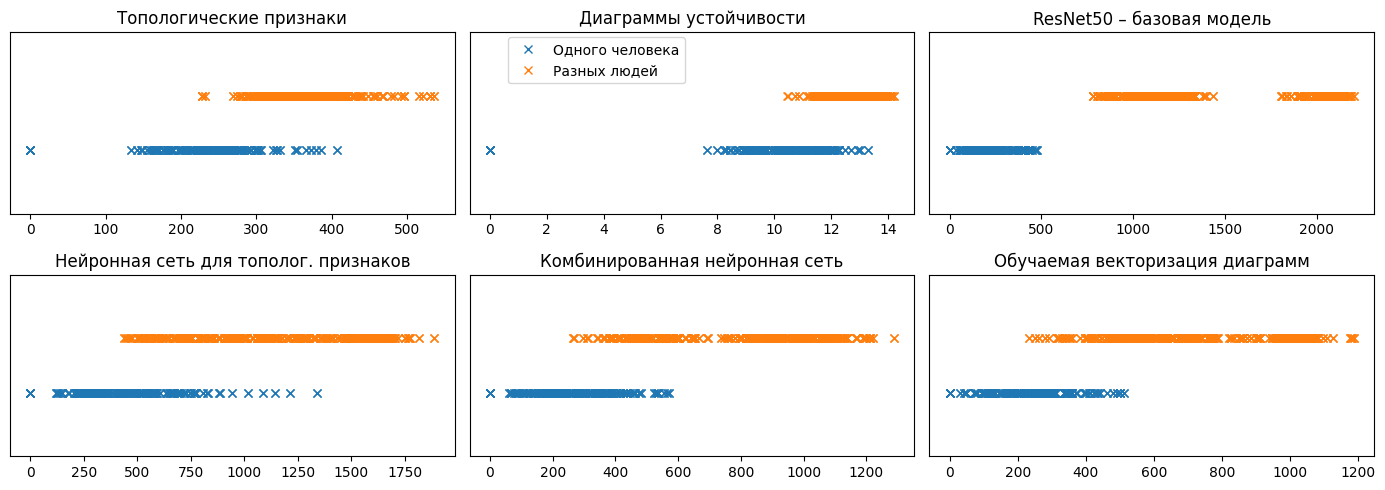

In [6]:
import cvtda.face_recognition

cvtda.face_recognition.learn(
    train_images, train_features, train_labels, train_diagrams,
    test_images, test_features, test_labels, test_diagrams,
    dump_name = "5/predictions"
)

In [5]:
import cvtda.neural_network

nn_train = cvtda.neural_network.Dataset(
    train_images, train_diagrams, train_features, train_labels
)
nn_test = cvtda.neural_network.Dataset(
    test_images, test_diagrams, test_features, test_labels
)

Dataset: processing diagrams:   7%|▋         | 32/434 [00:05<01:06,  6.01it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Dataset: processing diagrams: 100%|██████████| 434/434 [00:21<00:00, 20.24it/s]


Constructed a dataset of 370 images of shape torch.Size([1, 64, 64]) with 868 diagrams and 53817 features


Dataset: processing diagrams: 100%|██████████| 434/434 [00:00<00:00, 1698.05it/s]


Constructed a dataset of 30 images of shape torch.Size([1, 64, 64]) with 868 diagrams and 53817 features


In [6]:
import cvtda.face_recognition

learner = cvtda.face_recognition.NNLearner(
    n_jobs = 1,
    skip_diagrams = True,
    skip_images = True,
    skip_features = False
).fit(nn_train, nn_test)

correct_dists, incorrect_dists = learner.estimate_quality(nn_test)

Topology:  True
Images:  torch.Size([64, 1, 64, 64])
Features:  torch.Size([64, 53817])


d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Input to LazyLinear: 1024
Parameters: 57477120


Analyzing distances: 100%|██████████| 900/900 [00:00<00:00, 10474.47it/s]


In [7]:
correct_keys = list(correct_dists.keys())
correct_values = numpy.array(list(correct_dists.values()))
correct_idxs = numpy.argsort(correct_values)[::-1]

In [8]:
incorrect_keys = list(incorrect_dists.keys())
incorrect_values = numpy.array(list(incorrect_dists.values()))
incorrect_idxs = numpy.argsort(incorrect_values)

6 1
7 1
8 0
3 0
8 1
---------
12 7
17 4
17 7
13 7
17 9


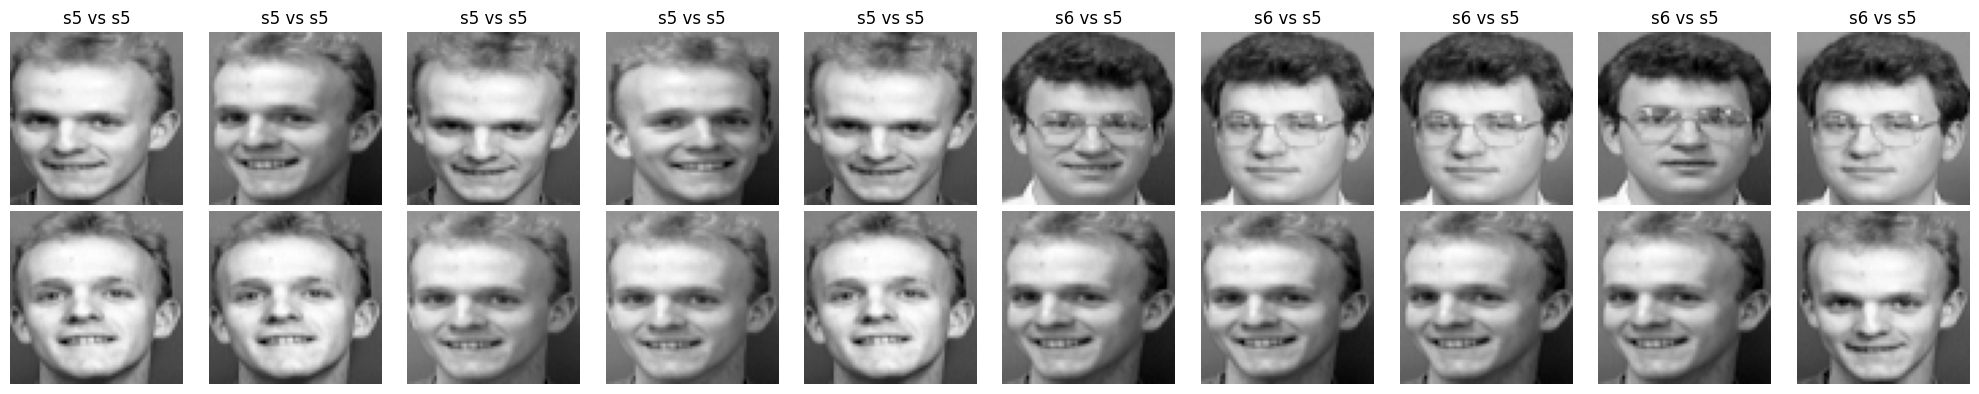

In [10]:
import matplotlib.pyplot as plt


figure, axes = plt.subplots(2, 10, figsize = (20, 4))

cou, i = 0, 0
while cou < 5:
    first, second = correct_keys[correct_idxs[i]]
    i += 1
    if first < second:
        continue
    print(first, second)
    axes[0][cou].set_title(f"{test.classes[test_labels[first]]} vs {test.classes[test_labels[second]]}")
    axes[0][cou].imshow(test_images[first], cmap = "gray")
    axes[1][cou].imshow(test_images[second], cmap = "gray")
    axes[0][cou].axis(False)
    axes[1][cou].axis(False)
    cou += 1

print('---------')

i = 0
while cou < 10:
    first, second = incorrect_keys[incorrect_idxs[i]]
    i += 1
    if first < second:
        continue
    print(first, second)
    axes[0][cou].set_title(f"{test.classes[test_labels[first]]} vs {test.classes[test_labels[second]]}")
    axes[0][cou].imshow(test_images[first], cmap = "gray")
    axes[1][cou].imshow(test_images[second], cmap = "gray")
    axes[0][cou].axis(False)
    axes[1][cou].axis(False)
    cou += 1    


figure.tight_layout()

plt.savefig("5/predictions/error_examples.svg")
plt.savefig("5/predictions/error_examples.png")